In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Data/pitch_swing.csv")

In [9]:
# Only take players with more than 100 plate appearances
player_plate_appearance= df.groupby('player_name').size().reset_index(name='plate_appearances')
valid_players = player_plate_appearance[player_plate_appearance['plate_appearances'] > 100]['player_name']

In [10]:
player_data = df[df['player_name'].isin(valid_players)].groupby('player_name').agg(
    avg_swing_length=('swing_length', 'mean'),
    std_swing_length=('swing_length', 'std'),
    avg_bat_speed=('bat_speed', 'mean'),
    std_bat_speed=('bat_speed', 'std'),
    woba_value=('woba_value', 'mean')
).reset_index()

In [11]:
# coefficient of variance is standard deviation divided by mean
player_data['coeff_var_swing_length'] = player_data['std_swing_length'] / player_data['avg_swing_length']
player_data['coeff_var_bat_speed'] = player_data['std_bat_speed'] / player_data['avg_bat_speed']

In [12]:
# Training features and output feature
X = player_data[['avg_swing_length', 'coeff_var_swing_length', 'avg_bat_speed', 'coeff_var_bat_speed']]
Y = player_data[['woba_value']]

In [13]:
#Split into 80/20 training testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

training_error = mean_squared_error(Y_train, Y_pred_train)
test_error = mean_squared_error(Y_test, Y_pred_test)

print(f"Training Error: {training_error}")
print(f"Test Error: {test_error}")


Training Error: 0.0030460752702249076
Test Error: 0.002820226852513304


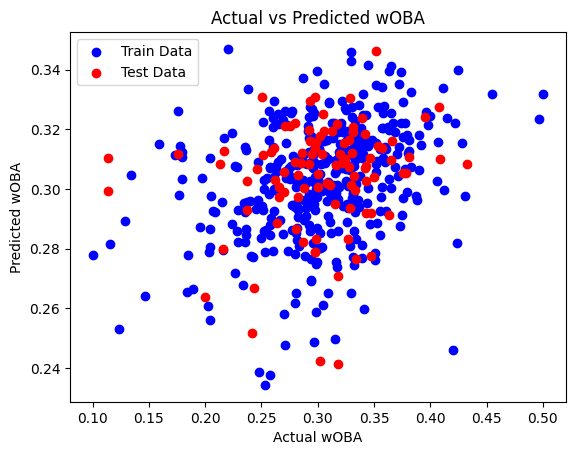

In [15]:
# Scatter plot for training data
plt.scatter(Y_train, Y_pred_train, color='blue', label='Train Data')
plt.scatter(Y_test, Y_pred_test, color='red', label='Test Data')
plt.xlabel('Actual wOBA')
plt.ylabel('Predicted wOBA')
plt.title('Actual vs Predicted wOBA')
plt.legend()
plt.show()

In [16]:
# Using XGBoost
model = XGBRegressor(random_state = 42)
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

training_error = mean_squared_error(Y_train, Y_pred_train)
test_error = mean_squared_error(Y_test, Y_pred_test)

print(f"Training Error: {training_error}")
print(f"Test Error: {test_error}")


Training Error: 2.270550339744659e-06
Test Error: 0.004332368262112141
